## Decision tree regressor implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [5]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
# create a data frame
df = pd.DataFrame(data.data, columns = data.feature_names)

In [11]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
df.shape

(20640, 8)

In [13]:
df['AveBedrms']

0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20635    1.133333
20636    1.315789
20637    1.120092
20638    1.171920
20639    1.162264
Name: AveBedrms, Length: 20640, dtype: float64

In [14]:
df.sample(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10591,6.1150,19.0,7.645260,1.012232,1027.0,3.140673,33.68,-117.78
12305,3.0625,25.0,12.517606,2.536385,1874.0,2.199531,33.75,-116.71
6796,2.3464,30.0,4.141618,1.147399,1110.0,3.208092,34.08,-118.14
2576,2.8833,29.0,5.793911,1.060890,1130.0,2.646370,40.79,-124.13


In [15]:
df = df.sample(frac=0.20)

In [16]:
df.shape

(4128, 8)

In [17]:
# Separate independent variable(x) and dependent varable(y)

x = df.iloc[:, :-1]
y = df.iloc[:, -1] # all the rows and last columns

In [18]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
4025,3.8550,18.0,4.770030,1.047478,2897.0,2.149110,34.17
18228,3.5750,18.0,3.556627,1.139759,838.0,2.019277,37.41
15604,6.6361,17.0,7.557562,1.085779,1222.0,2.758465,32.82
6568,4.1518,52.0,5.546584,0.950311,1018.0,3.161491,34.20
6102,4.5221,36.0,5.267974,0.960784,446.0,2.915033,34.11
...,...,...,...,...,...,...,...
19011,3.6176,24.0,6.478261,1.008696,300.0,2.608696,38.35
13507,2.2449,30.0,7.508039,1.167203,1214.0,3.903537,34.13
6579,7.4190,41.0,6.725166,0.973510,859.0,2.844371,34.20
18792,2.8036,27.0,4.797508,0.981308,883.0,2.750779,40.61


In [19]:
y

4025    -118.53
18228   -122.09
15604   -116.75
6568    -118.15
6102    -117.89
          ...  
19011   -122.00
13507   -117.33
6579    -118.19
18792   -122.57
5742    -118.25
Name: Longitude, Length: 4128, dtype: float64

### train test split

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [21]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
19859,2.0227,10.0,4.270396,1.060606,1664.0,3.878788,36.34
14640,4.7788,31.0,6.422932,1.001880,1245.0,2.340226,32.79
8765,6.0150,41.0,6.794964,1.082734,802.0,2.884892,33.81
15276,4.0000,24.0,5.053846,1.013462,1389.0,2.671154,33.08
14984,4.7679,11.0,6.390805,0.942529,441.0,2.534483,32.72
...,...,...,...,...,...,...,...
17919,4.3971,18.0,3.665953,1.089936,972.0,2.081370,37.35
1841,4.0536,46.0,5.889831,0.977401,748.0,2.112994,37.91
16289,1.7694,28.0,4.594444,1.063889,3201.0,4.445833,37.92
16109,3.7552,45.0,5.178363,1.020468,1098.0,3.210526,37.74


In [22]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
10943,2.8077,31.0,4.179104,1.104478,1718.0,6.410448,33.74
14910,3.5096,31.0,5.640559,1.000000,2585.0,3.615385,32.61
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85
14822,1.1250,52.0,5.333333,1.333333,8.0,2.666667,32.66
14090,2.8750,30.0,4.421687,1.142169,934.0,2.250602,32.76
...,...,...,...,...,...,...,...
14801,2.6724,28.0,4.131657,1.044379,1825.0,2.699704,32.59
6725,10.6767,48.0,8.171617,1.033003,900.0,2.970297,34.12
9874,3.5000,33.0,5.172535,1.014085,1516.0,2.669014,36.62
11547,6.1280,26.0,6.457143,1.023529,1961.0,3.295798,33.74


In [23]:
# implement
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [24]:
y_pred = model.predict(x_test)
y_pred

array([-120.1 , -117.25, -118.41, -117.34, -117.21, -120.99, -119.78,
       -118.2 , -122.04, -117.06, -118.91, -121.83, -118.85, -121.87,
       -119.12, -119.34, -118.42, -118.3 , -122.01, -121.82, -118.22,
       -122.26, -118.05, -116.99, -118.23, -117.29, -118.48, -118.04,
       -119.02, -118.39, -121.41, -118.29, -118.39, -120.98, -117.64,
       -118.23, -120.85, -118.12, -122.47, -117.82, -118.3 , -118.13,
       -117.56, -122.18, -116.96, -122.47, -122.43, -121.85, -118.3 ,
       -121.87, -121.79, -122.25, -117.94, -122.31, -118.32, -122.37,
       -118.25, -119.27, -121.76, -117.94, -121.16, -121.99, -119.79,
       -117.64, -121.17, -117.2 , -116.96, -121.73, -118.14, -117.69,
       -118.21, -118.21, -118.25, -122.18, -121.38, -122.68, -120.43,
       -118.37, -120.97, -117.88, -122.04, -117.87, -121.27, -117.08,
       -118.18, -121.98, -119.19, -118.2 , -118.21, -118.42, -116.02,
       -117.57, -119.57, -118.26, -121.24, -117.87, -117.91, -120.98,
       -122.16, -118

In [25]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.8915054895398149

#### Hyperparamter Turing

In [26]:
params = {
    'criterion': ['Squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2, 3, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [27]:
regressor = DecisionTreeRegressor()

In [28]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=3)

In [ ]:
model.fit(x_train, y_train) 

In [30]:
model.best_params_

{'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [32]:
final_model = DecisionTreeRegressor(criterion='absolute_error', max_depth= 10, max_features='log2', splitter='best')

In [33]:
final_model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      max_features='log2')

[Text(0.6130765199161425, 0.9545454545454546, 'x[6] <= 36.465\nabsolute_error = 1.774\nsamples = 3302\nvalue = -118.605'),
 Text(0.3590638102725367, 0.8636363636363636, 'x[3] <= 1.318\nabsolute_error = 0.578\nsamples = 1919\nvalue = -118.11'),
 Text(0.48607016509433965, 0.9090909090909092, 'True  '),
 Text(0.17390592243186584, 0.7727272727272727, 'x[6] <= 33.605\nabsolute_error = 0.558\nsamples = 1857\nvalue = -118.12'),
 Text(0.0710167714884696, 0.6818181818181818, 'x[3] <= 1.033\nabsolute_error = 0.22\nsamples = 311\nvalue = -117.12'),
 Text(0.041666666666666664, 0.5909090909090909, 'x[6] <= 33.43\nabsolute_error = 0.192\nsamples = 108\nvalue = -117.09'),
 Text(0.018343815513626835, 0.5, 'x[0] <= 1.771\nabsolute_error = 0.162\nsamples = 100\nvalue = -117.08'),
 Text(0.0041928721174004195, 0.4090909090909091, 'x[6] <= 32.7\nabsolute_error = 0.023\nsamples = 3\nvalue = -115.53'),
 Text(0.0020964360587002098, 0.3181818181818182, 'absolute_error = 0.0\nsamples = 1\nvalue = -115.49'),
 Te

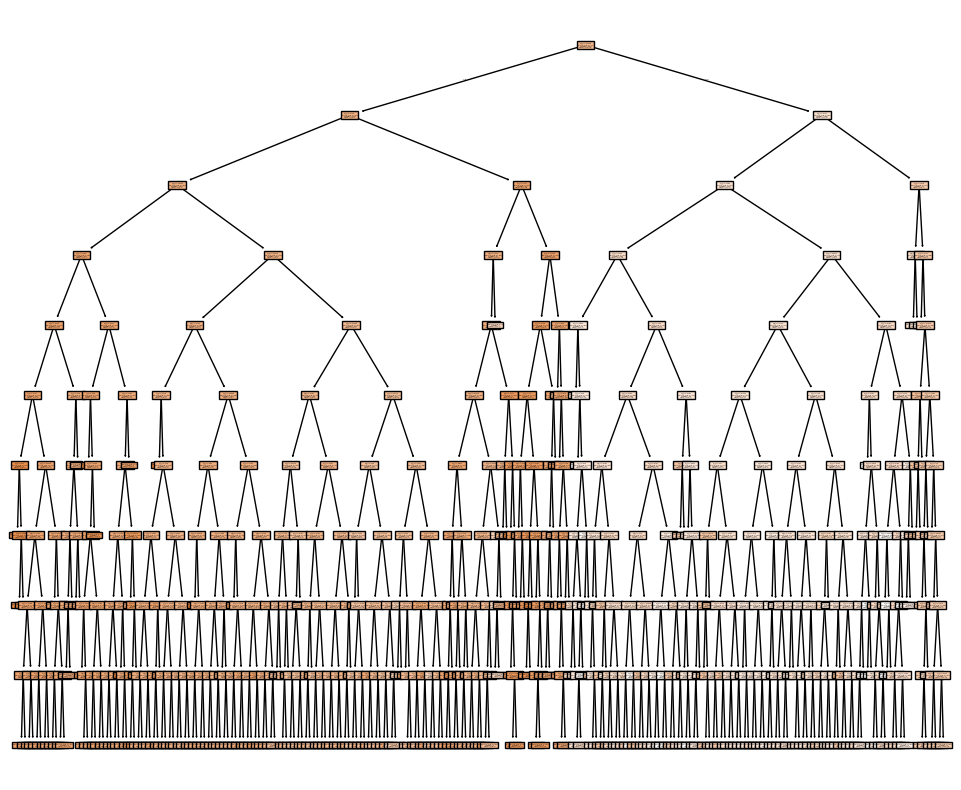

In [34]:
from sklearn import tree
plt.figure(figsize=(12, 10))
tree.plot_tree(final_model, filled=True)

In [35]:
y_pred = model.predict(x_test)
r2_score(y_pred, y_test)

0.8696756176116033

In [36]:
## @ngaj 01-11-2025